## Setup

In [2]:
#Data Wranling
import pandas as pd 
import numpy as np 
import sidetable
from scipy import stats

#Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 

from ipywidgets import interact




Configuração de plots 


In [3]:
sns.set_theme(
    context='talk',
    style='ticks',
    palette='viridis',
    font_scale= .8,
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha':.2,
        'axes.titlesize':'x-large',
        'axes.titleweight':'bold',
        'axes.titlepad':20,  
    }
       
)

#Removendo warnings
import warnings
warnings.simplefilter('ignore')

Load Data

In [4]:
#Load data 
df = pd.read_csv('ds_salaries.csv', index_col=0)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## Data Understanding


**As colunas presentes no conjunto de dados são**:


Ano: ano de atuação, de 2019 a 

Nível de experiência: júnior, pleno, sênior e executivo

Tipo de emprego: full-time, contrato ou freelancer

Título do cargo

Salário: salário original da pessoa

Salário em USD: salário convertido para dólar americano

Localização: país de residência do empregado

Taxa de trabalho remoto: 0%, 50% ou 100%

Localização da empresa

Tamanho da empresa: pequeno, médio ou grande

## EDA

Verificando tipos de variáveis e consumo de memória

In [5]:
#Infos gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [6]:
memory_usage1 = df.memory_usage().sum()

In [7]:
#Colunas tipo objeto 
df.columns[df.dtypes==object]

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

In [8]:
#Definindo as colunas categóricas
categorical_columns = df.columns[df.dtypes==object].tolist() +['work_year', 'remote_ratio']

#Convertendo categóricas 'objetct' para 'category'
df[categorical_columns] = df[categorical_columns].astype('category')

In [9]:
#Vericando a memória
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           607 non-null    category
 1   experience_level    607 non-null    category
 2   employment_type     607 non-null    category
 3   job_title           607 non-null    category
 4   salary              607 non-null    int64   
 5   salary_currency     607 non-null    category
 6   salary_in_usd       607 non-null    int64   
 7   employee_residence  607 non-null    category
 8   remote_ratio        607 non-null    category
 9   company_location    607 non-null    category
 10  company_size        607 non-null    category
dtypes: category(9), int64(2)
memory usage: 28.4 KB


Verificando nulos e duplicados

In [10]:
#Dados nulos
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [11]:
#Dados duplicados 
duplicated = df.duplicated()
df[duplicated]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
217,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
256,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
331,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
332,2022,SE,FT,Data Analyst,112900,USD,112900,US,100,US,M
333,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
353,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
362,2022,SE,FT,Data Analyst,130000,USD,130000,CA,100,CA,M
363,2022,SE,FT,Data Analyst,61300,USD,61300,CA,100,CA,M
370,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
374,2022,MI,FT,ETL Developer,50000,EUR,54957,GR,0,GR,M


In [12]:
#Removendo dados duplicados
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

## Análise univariada

Análise univariada com variáveis numéricas e categóricas, separadamente.

In [13]:
#Variáveis numéricas
df.select_dtypes('number').describe()

,salary,salary_in_usd
count,5.650000e+02,565.000000
mean,3.381160e+05,110610.343363
std,1.599879e+06,72280.702792
min,4.000000e+03,2859.000000
25%,6.700000e+04,60757.000000
50%,1.109250e+05,100000.000000
75%,1.650000e+05,150000.000000
max,3.040000e+07,600000.000000


In [14]:
#Variáveis categóricas
df.select_dtypes('category').describe()

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
count,565,565,565,565,565,565,565,565,565
unique,3,4,4,50,17,57,3,50,3
top,2022,SE,FT,Data Scientist,USD,US,100,US,M
freq,278,243,546,130,359,295,346,318,290


Tabela de frequência para as variáveis categóricas

In [15]:
#Coluna experience_level
df.experience_level.value_counts()

experience_level
SE    243
MI    208
EN     88
EX     26
Name: count, dtype: int64

In [16]:
#Vericando com sidetable
df.stb.freq(['experience_level'])

,experience_level,count,percent,cumulative_count,cumulative_percent
0,SE,243,43.008850,243,43.008850
1,MI,208,36.814159,451,79.823009
2,EN,88,15.575221,539,95.398230
3,EX,26,4.601770,565,100.000000


In [17]:
#Todas frequências 
for categorical_column in categorical_columns:
    print(f'## -- {categorical_column} -- ##')
    display(df.stb.freq(['experience_level']))
    print()

## -- experience_level -- ##


,experience_level,count,percent,cumulative_count,cumulative_percent
0,SE,243,43.008850,243,43.008850
1,MI,208,36.814159,451,79.823009
2,EN,88,15.575221,539,95.398230
3,EX,26,4.601770,565,100.000000



## -- employment_type -- ##


,experience_level,count,percent,cumulative_count,cumulative_percent
0,SE,243,43.008850,243,43.008850
1,MI,208,36.814159,451,79.823009
2,EN,88,15.575221,539,95.398230
3,EX,26,4.601770,565,100.000000



## -- job_title -- ##


,experience_level,count,percent,cumulative_count,cumulative_percent
0,SE,243,43.008850,243,43.008850
1,MI,208,36.814159,451,79.823009
2,EN,88,15.575221,539,95.398230
3,EX,26,4.601770,565,100.000000



## -- salary_currency -- ##


,experience_level,count,percent,cumulative_count,cumulative_percent
0,SE,243,43.008850,243,43.008850
1,MI,208,36.814159,451,79.823009
2,EN,88,15.575221,539,95.398230
3,EX,26,4.601770,565,100.000000



## -- employee_residence -- ##


,experience_level,count,percent,cumulative_count,cumulative_percent
0,SE,243,43.008850,243,43.008850
1,MI,208,36.814159,451,79.823009
2,EN,88,15.575221,539,95.398230
3,EX,26,4.601770,565,100.000000



## -- company_location -- ##


,experience_level,count,percent,cumulative_count,cumulative_percent
0,SE,243,43.008850,243,43.008850
1,MI,208,36.814159,451,79.823009
2,EN,88,15.575221,539,95.398230
3,EX,26,4.601770,565,100.000000



## -- company_size -- ##


,experience_level,count,percent,cumulative_count,cumulative_percent
0,SE,243,43.008850,243,43.008850
1,MI,208,36.814159,451,79.823009
2,EN,88,15.575221,539,95.398230
3,EX,26,4.601770,565,100.000000



## -- work_year -- ##


,experience_level,count,percent,cumulative_count,cumulative_percent
0,SE,243,43.008850,243,43.008850
1,MI,208,36.814159,451,79.823009
2,EN,88,15.575221,539,95.398230
3,EX,26,4.601770,565,100.000000



## -- remote_ratio -- ##


,experience_level,count,percent,cumulative_count,cumulative_percent
0,SE,243,43.008850,243,43.008850
1,MI,208,36.814159,451,79.823009
2,EN,88,15.575221,539,95.398230
3,EX,26,4.601770,565,100.000000


## Gráficos

Variáveis categóricas

In [18]:
#Gráfico de pizza 
df_count = df.stb.freq(['experience_level'])

px.pie(df_count, values='count', names='experience_level' )

**INSIGHTS**

**1. Forte presença de profissionais experientes:**
Com quase 80% da equipe composta por profissionais Pleno e Sênior, a empresa pode estar focada em garantir alta performance e eficiência nos projetos. Isso pode significar menor necessidade de supervisão e mais autonomia nas entregas.

 

**2. Baixa entrada de novos talentos (Júnior: 15.6%)**
A pouca representatividade do nível Júnior pode indicar uma barreira na entrada de novos profissionais, o que pode gerar desafios na renovação do time no futuro.

**3. Poucos executivos (4.6%)**
Com uma proporção tão pequena de executivos, pode haver sobrecarga nos níveis estratégicos, dificultando a tomada de decisões ágeis.

 



In [19]:
@interact(categorical_column=['experience_level','employment_type','remote_ratio','company_size'])
def pie_plot(categorical_column):
 df_count = df.stb.freq([categorical_column])
 fig = px.pie(df_count, values='count', names= categorical_column)
 fig.update_layout(title=dict(text=f'<b> {categorical_column}</b>', x=.5))
 fig.show()
 


interactive(children=(Dropdown(description='categorical_column', options=('experience_level', 'employment_type…

**INSIGHTS**

**1. Predominância do modelo 100% remoto:**
Mais de 60% da força de trabalho atua de forma totalmente remota, indicando que a empresa adota um modelo distribuído.



**2. Baixa adesão ao modelo híbrido (17.3%):**
O trabalho híbrido, que equilibra remoto e presencial, tem a menor participação na amostra.



**3. Trabalho presencial ainda tem espaço (21.4%):**
Apesar da forte adesão ao remoto, mais de 20% dos funcionários ainda trabalham presencialmente. Isso pode estar ligado à necessidade de presença física para determinadas funções.





In [20]:
#Gráfico de barras
@interact(categorical_column= categorical_columns)  #todas colunas categóricas
def pie_plot(categorical_column):
 df_count = df.stb.freq([categorical_column])
 fig = px.bar(df_count, y='count', x= categorical_column)
 fig.update_layout(title=dict(text=f'<b> {categorical_column}</b>', x=.5))
 fig.show()

interactive(children=(Dropdown(description='categorical_column', options=('experience_level', 'employment_type…

**INSIGHTS**

1. **Predominância de empresas de médio porte:**
As empresas de porte médio (M) são as mais numerosas, indicando que a maior parte das organizações nesta amostra não são nem startups pequenas nem grandes corporações.


2. **Representatividade significativa de grandes empresas (L):**
As empresas de grande porte (L) aparecem como a segunda categoria mais comum. Isso sugere que há uma participação relevante de empresas estabelecidas, que possuem mais recursos e estrutura.

3. **Baixa participação de pequenas empresas (S):**
As empresas de pequeno porte (S) representam a menor fatia da distribuição. Isso pode indicar que startups ou negócios emergentes são menos frequentes nesta análise.



Variáveis numéricas

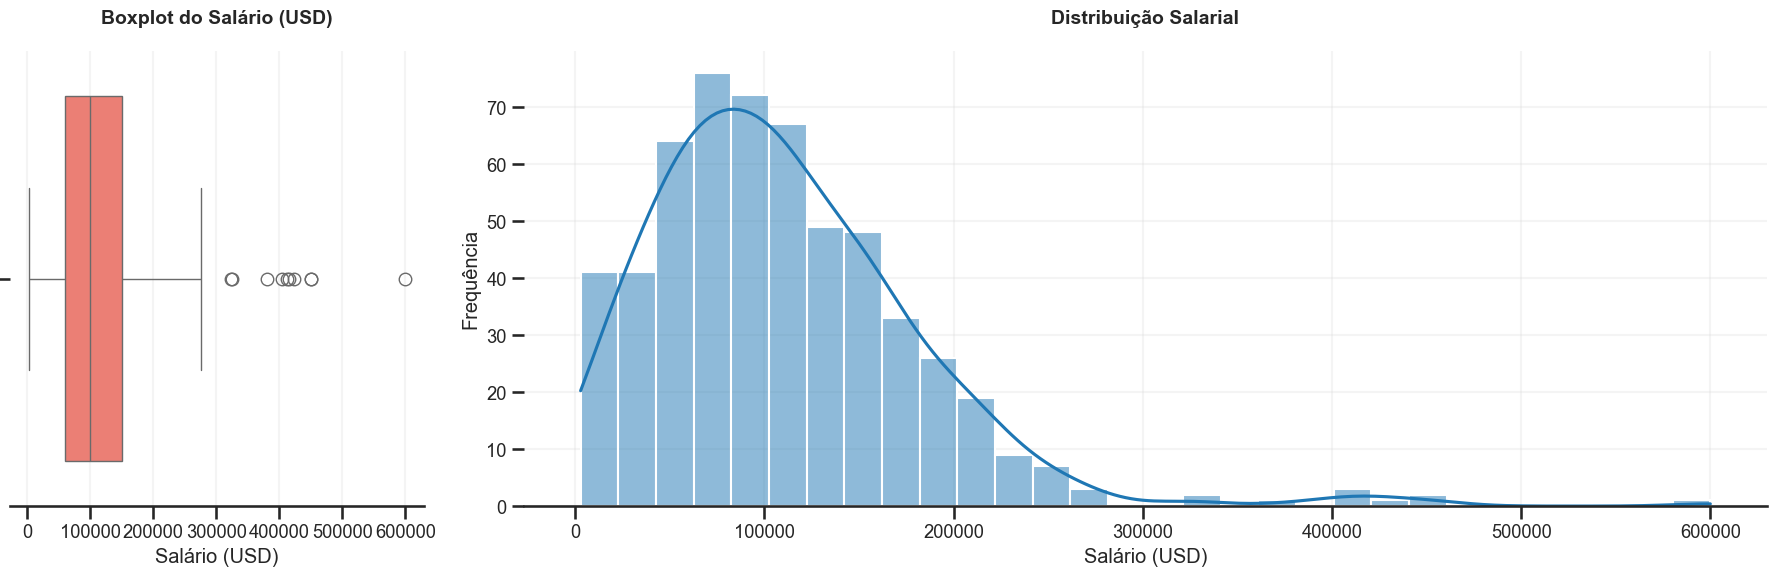

In [21]:
#Figura e os eixos
fig, axes = plt.subplots(ncols=2, figsize=(18, 6), gridspec_kw={'width_ratios': [0.25, 0.75]})

#Boxplot
sns.boxplot(data=df, x='salary_in_usd', ax=axes[0], color='#FF6F61')
axes[0].set_title('Boxplot do Salário (USD)', fontsize=14)
axes[0].set_xlabel('Salário (USD)')

#Histograma 
sns.histplot(data=df, x='salary_in_usd', kde=True, ax=axes[1], color='#1F77B4', bins=30)
axes[1].set_title('Distribuição Salarial', fontsize=14)
axes[1].set_xlabel('Salário (USD)')
axes[1].set_ylabel('Frequência')

# Melhorar a estética
sns.despine(left=True)
plt.tight_layout()
plt.show()

**INSIGHTS**

1.**Boxplot:**

 A mediana está próxima de 100.000 USD.
 
 A maioria dos salários está dentro do intervalo interquartil (entre Q1 e Q3), aproximadamente entre 50.000 e 150.000 USD.
 
 Existem vários outliers acima de 200.000 USD, indicando alguns salários muito altos.
 
 

2.**Histograma:**

 A distribuição tem um pico entre 50.000 e 150.000 USD, indicando que a maioria dos salários se concentra nesta faixa.
 
 A curva sugere uma distribuição assimétrica à direita, com alguns salários muito altos.
 
 Existem poucos funcionários ganhando acima de 300.000 USD, confirmando a presença de altos salários como exceção.


In [22]:
#Coeficiente de assimetria de salários
stats.skew(df.salary_in_usd)

np.float64(1.7282336070348854)

Análise: como podemos ver a assimetria é positiva (direita), como vimos no histograma.

In [23]:
#Curtose da distribuição
stats.kurtosis(df.salary_in_usd)

np.float64(6.38414589529744)

Análise: esse valor indica que a distribuição é altamente leptocúrtica, ou seja, com muitos outliers, também visto no histograma e boxplot.

## Análise Multivariada

In [24]:
#Show df
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


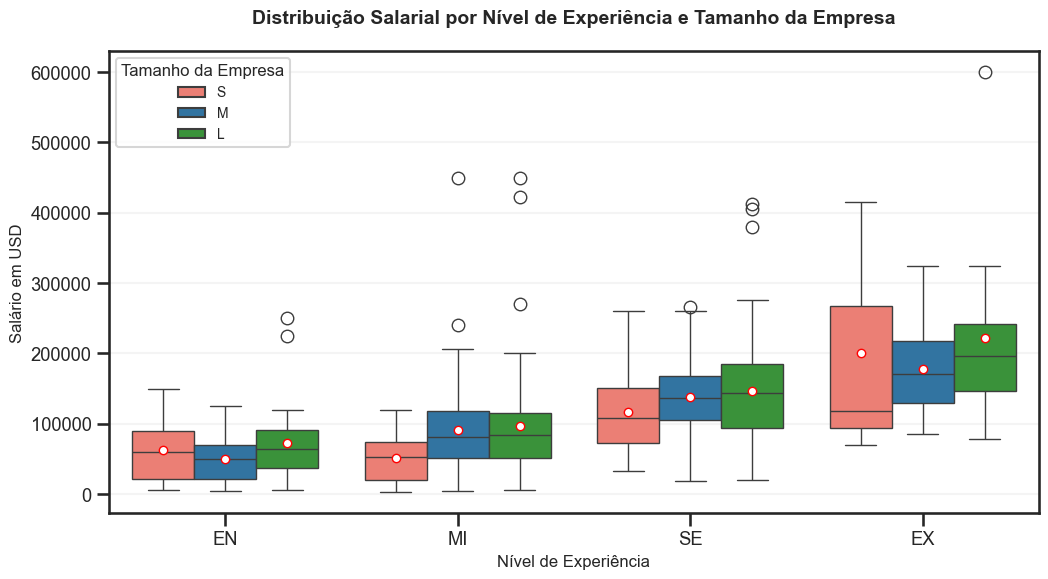

In [25]:
#Criando a figura
plt.figure(figsize=(12, 6))

#Boxplot
sns.boxplot(
    data=df, x='experience_level', y='salary_in_usd', hue='company_size',
    order=['EN', 'MI', 'SE', 'EX'], hue_order=['S', 'M', 'L'],
    showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"red"},
    palette={'S': '#FF6F61', 'M': '#1F77B4', 'L': '#2CA02C'}  # Cores personalizadas
)

#Títulos e rótulos
plt.title('Distribuição Salarial por Nível de Experiência e Tamanho da Empresa', fontsize=14, fontweight='bold')
plt.xlabel('Nível de Experiência', fontsize=12)
plt.ylabel('Salário em USD', fontsize=12)

# Ajuste da legenda
plt.legend(title='Tamanho da Empresa', title_fontsize=12, fontsize=10, loc='upper left')

# Exibir gráfico
plt.show()

**INSIGHTS:**

1. Empresas de tamanho L (Grandes) tendem a oferecer salários mais altos em comparação com empresas de tamanho M (Médias) e S (Pequenas). Isso pode ser devido à maior capacidade financeira e à complexidade das operações em empresas maiores.

2. Profissionais com nível de experiência EX (Experiente) geralmente recebem salários mais altos do que aqueles com nível SE (Sênior), independentemente do tamanho da empresa.

3. A diferença salarial entre SE e EX é mais pronunciada em empresas de tamanho L, indicando que grandes empresas estão dispostas a pagar mais por experiência avançada.

4. Para o nível SE, a dispersão salarial é menor, sugerindo que os salários para profissionais sênior são mais padronizados.

5. O gráfico mostra uma tendência clara de aumento salarial com o aumento do tamanho da empresa e do nível de experiência. Isso reforça a ideia de que empresas maiores e mais experientes têm maior capacidade de investir em talentos.


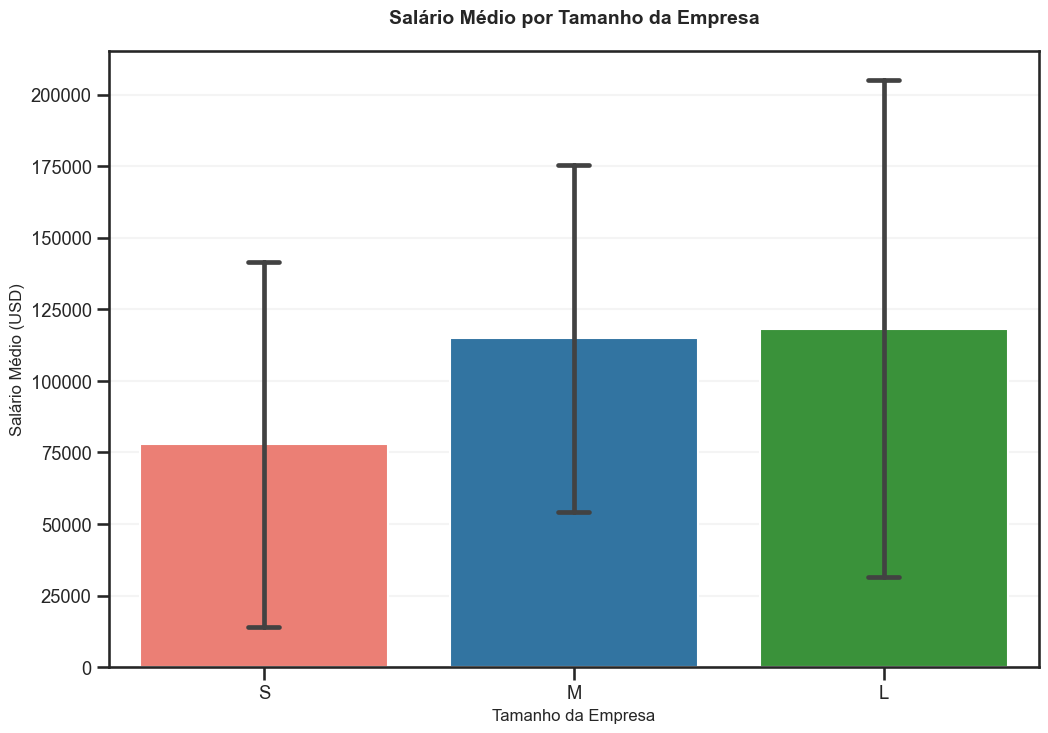

In [26]:
# Barplot
ax = sns.barplot(
    data=df, x='company_size', y='salary_in_usd',
    order=['S', 'M', 'L'], palette=['#FF6F61', '#1F77B4', '#2CA02C'],
    errorbar='sd', capsize=0.1
)

# Melhorar títulos e rótulos
plt.title('Salário Médio por Tamanho da Empresa', fontsize=14, fontweight='bold')
plt.xlabel('Tamanho da Empresa', fontsize=12)
plt.ylabel('Salário Médio (USD)', fontsize=12)

# Exibir gráfico
plt.show()

**INSIGHTS:**

1. Empresas maiores tendem a ter salários médios mais altos, o que pode ser atribuído à sua maior capacidade financeira e à complexidade das operações.

2. Empresas menores mostram uma variação salarial menor, indicando que os salários são mais consistentes, mas geralmente mais baixos.

3. A mediana salarial aumenta com o tamanho da empresa, reforçando a tendência de que empresas maiores oferecem salários mais altos. Isso pode ser um indicativo de que empresas maiores têm mais recursos para investir em talentos.

4. Empresas de tamanho médio podem apresentar uma distribuição salarial mais consistente, com menos variação e outliers, indicando políticas de remuneração mais padronizadas.

In [ ]:
#Crosstab/frequência do tamanho da empresa x nível de experiencia
crosstab = (
  pd.crosstab(df['experience_level'], df['company_size'])
  .loc[['EN','MI','SE','EX'],['S','M','L']]  #acessando rótulos específicos
)

crosstab

company_size,S,M,L
experience_level,,,
EN,29,30,29
MI,28,96,84
SE,22,152,69
EX,3,12,11


In [ ]:
#Associação das variáveis empresa x nível de experiência
stats.contingency.association(crosstab)

0.1961418770417252

O valor 0.196 indica que há uma relação fraca entre o nível de experiência dos profissionais e o tamanho da empresa em que trabalham.

Isso significa que o tamanho da empresa não é um fator fortemente determinante para o nível de experiência dos profissionais, ou vice-versa.

In [38]:
#Matriz expected do crosstab (comparação entre valor obervado vs esperado)
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
expected

array([[ 12.77168142,  45.16814159,  30.06017699],
       [ 30.18761062, 106.76106195,  71.05132743],
       [ 35.26725664, 124.72566372,  83.00707965],
       [  3.77345133,  13.34513274,   8.88141593]])

In [ ]:
#Diferença entre crosstab e valore esperados
(crosstab - expected).style.background_gradient(cmap = 'Reds')

company_size,S,M,L
experience_level,,,
EN,16.228319,-15.168142,-1.060177
MI,-2.187611,-10.761062,12.948673
SE,-13.267257,27.274336,-14.007080
EX,-0.773451,-1.345133,2.118584


**INSIGHTS:**

As maiores diferenças ocorrem para:

Profissionais em nível inicial (EN) em empresas pequenas (mais do que o esperado).

Profissionais sênior (SE) em empresas médias (mais do que o esperado).

Profissionais em nível intermediário (MI) em empresas grandes (mais do que o esperado).

In [39]:
#Distribuiçoes gerais 
@interact(x=df.columns.tolist(), hue=df.columns.tolist() + [None])  #função p escolher qualquer coluna e pintando por qualquer coluna ou nenhuma
def plot(x, hue):
    #Histograma
    sns.histplot(data=df, x=x, hue=hue, palette='tab10', alpha=0.5, bins=30)
    #Título
    plt.title(f'Distribuição de {x} {"por " + hue if hue else ""}', fontsize=14, fontweight='bold')
    #Legenda
    if hue:
        plt.legend(title=hue, fontsize=10)
    
    sns.despine()  #Remover bordas desnecessárias
    plt.show()

interactive(children=(Dropdown(description='x', options=('work_year', 'experience_level', 'employment_type', '…